<a href="https://colab.research.google.com/github/Rusagor/WP/blob/master/13_%D0%A0%D0%B0%D0%B7%D0%B1%D0%BE%D1%80_%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import matplotlib.pyplot as plt # matplotlib для графиков
import seaborn as sns # seaborn для графиков
import numpy as np    # Нампай для массивов
import pandas as pd   # Пандас для данных
import re             # Регулярные выражения
from tensorflow.keras import utils # Для приведения к категориальным данным
from google.colab import files     # Загрузка файлов 
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Задание Light

Для выполнения этого задания используйте базу hh_parsed_new.csv. Ссылка на неё есть в геткурсе под этим занятием. 
1.  Обратите внимание, что в базе, помимо адекватных ответов, есть различные 
“выбросы” типа: возраст 0 или 120 лет, желаемая зарплата 1 рубль и т.д. Проанализируйте базу на такие выбросы и проведите исследования, схожие с ноутбуком занятия с учетом выбросов. Насколько масштабными окажутся изменения?
2.  На занятии не рассматривалась статистика людей, которые могли не указать пол. Проанализируйте, какие поля наиболее часто встречаются у таких лиц, какая средняя зарплата и другие показатели?
3.  Возьмите базу с занятия и посмотрите, сколько в среднем запрашивают разработчики Java, Python, C++. 


In [ ]:
files.upload()

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Загрузим данные
data_check = pd.read_csv('hh_parsed_new.csv')
data = pd.read_csv('hh_parsed_new.csv')

In [8]:
data_check = pd.read_csv('/content/drive/My Drive/13 Анализ данных/hh_parsed_new.csv')
data = pd.read_csv('/content/drive/My Drive/13 Анализ данных/hh_parsed_new.csv')

In [9]:
data

,Пол,Возраст,ЗП,Город,Занятость,График,Опыт (двойное нажатие для полной версии),Образование и ВУЗ,Ищет работу на должность
0,М,44,27000.0,малый или за пределами России город,полная занятость,полный день,73,среднее специальное,Старший администратор
1,М,42,60000.0,малый или за пределами России город,"частичная занятость, полная занятость","гибкий график, полный день",230,высшее,Старший IT инженер
2,М,45,65000.0,малый или за пределами России город,полная занятость,"полный день, удаленная работа",237,высшее,"Системный администратор, Системный инженер"
3,М,44,70000.0,Москва,полная занятость,"гибкий график, полный день, удаленная работа",69,высшее,"Web-программист, Web-администратор, Web-мастер"
4,М,41,45000.0,малый или за пределами России город,"частичная занятость, полная занятость","полный день, сменный график",161,высшее,Старший системный администратор \ начальник от...
...,...,...,...,...,...,...,...,...,...
66940,М,24,50000.0,малый или за пределами России город,"частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",12,среднее образование,Программист Python
66941,М,28,120000.0,Москва,полная занятость,полный день,93,высшее,Руководитель отдела по работе с ключевыми клие...
66942,М,56,80000.0,Санкт-Петербург,"частичная занятость, проектная работа, полная ...","гибкий график, полный день, удаленная работа",414,высшее,программист
66943,Ж,33,70000.0,Самара,полная занятость,полный день,110,высшее,Руководитель проектов


In [10]:
# Посмотрим какие есть уникальные значения возраста
data['Возраст'].unique()

array([ 44,  42,  45,  41,  36,  32,  46,  34,  31,  43,  33,  37,  38,
        52,  35,  29,  40,  26,  54,  27,  24,  64,  30,  39,  60,  28,
        58,  25,  50,  21,  48,  47,  61,  66,  63,  56,  49,  51,  53,
         0,  57,  67,  23,  62,  22,  20,  59,  55,  19,  65,  71,  74,
        68,  70,  78,  73,  18,  17,  69,  75,  15, 120,  92,  16,  79,
        72, 101])

In [11]:
# Уберем данные в которых был указан возраст меньше 18 и больше 80
data = data[(data['Возраст'] < 80) & (data['Возраст'] > 18)]

In [12]:
data['Возраст'].unique()

array([44, 42, 45, 41, 36, 32, 46, 34, 31, 43, 33, 37, 38, 52, 35, 29, 40,
       26, 54, 27, 24, 64, 30, 39, 60, 28, 58, 25, 50, 21, 48, 47, 61, 66,
       63, 56, 49, 51, 53, 57, 67, 23, 62, 22, 20, 59, 55, 19, 65, 71, 74,
       68, 70, 78, 73, 69, 75, 79, 72])

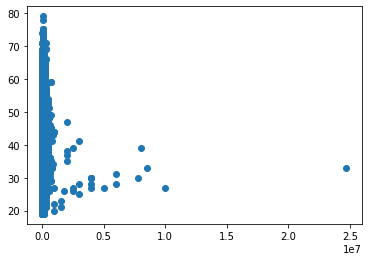

In [13]:
# Посмотрим уникальные значения зарплат
plt.scatter(x=data['ЗП'], y=data['Возраст'])

In [14]:
# Посмотрим на данные в которых зарплата больше 500 000
data[data['ЗП'] > 500000]

,Пол,Возраст,ЗП,Город,Занятость,График,Опыт (двойное нажатие для полной версии),Образование и ВУЗ,Ищет работу на должность
628,М,41,3000000.0,Москва,"частичная занятость, проектная работа, полная ...","гибкий график, полный день, удаленная работа",280,высшее,"Руководитель IT проектов, Роботизация, Автомат..."
3923,М,41,600000.0,Москва,полная занятость,полный день,243,высшее,Директор департамента ИТ
4684,Не указан,43,900000.0,малый или за пределами России город,"частичная занятость, проектная работа, полная ...",полный день,225,высшее,"CEO, CIO, Business Development"
5812,М,23,1500000.0,малый или за пределами России город,полная занятость,полный день,36,"среднее специальное, среднее образование",Оператор видеонаблюдения
6327,М,20,1000000.0,малый или за пределами России город,"стажировка, частичная занятость","гибкий график, удаленная работа",12,"высшее, неоконченное высшее",Специалист по IT
...,...,...,...,...,...,...,...,...,...
59571,М,36,650000.0,Москва,полная занятость,полный день,163,высшее,Head of DWH/BI/Analytics Department; Chief Dat...
60161,Не указан,33,552500.0,малый или за пределами России город,"проектная работа, полная занятость","гибкий график, полный день, удаленная работа",149,высшее,java/kotlin backend developer / architect / te...
61114,М,40,520000.0,Москва,"частичная занятость, проектная работа, полная ...","полный день, удаленная работа",150,высшее,Директор по развитию бизнеса
61888,Не указан,29,700000.0,малый или за пределами России город,"частичная занятость, проектная работа, полная ...","гибкий график, полный день, удаленная работа",132,высшее,Microsoft Stack Systems Architect / Chief Micr...


In [15]:
# Оставим значения ЗП не более 700 000 и не менее 20 000
data = data[(data['ЗП'] < 700000) & (data['ЗП'] > 20000)]
data

,Пол,Возраст,ЗП,Город,Занятость,График,Опыт (двойное нажатие для полной версии),Образование и ВУЗ,Ищет работу на должность
0,М,44,27000.0,малый или за пределами России город,полная занятость,полный день,73,среднее специальное,Старший администратор
1,М,42,60000.0,малый или за пределами России город,"частичная занятость, полная занятость","гибкий график, полный день",230,высшее,Старший IT инженер
2,М,45,65000.0,малый или за пределами России город,полная занятость,"полный день, удаленная работа",237,высшее,"Системный администратор, Системный инженер"
3,М,44,70000.0,Москва,полная занятость,"гибкий график, полный день, удаленная работа",69,высшее,"Web-программист, Web-администратор, Web-мастер"
4,М,41,45000.0,малый или за пределами России город,"частичная занятость, полная занятость","полный день, сменный график",161,высшее,Старший системный администратор \ начальник от...
...,...,...,...,...,...,...,...,...,...
66940,М,24,50000.0,малый или за пределами России город,"частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",12,среднее образование,Программист Python
66941,М,28,120000.0,Москва,полная занятость,полный день,93,высшее,Руководитель отдела по работе с ключевыми клие...
66942,М,56,80000.0,Санкт-Петербург,"частичная занятость, проектная работа, полная ...","гибкий график, полный день, удаленная работа",414,высшее,программист
66943,Ж,33,70000.0,Самара,полная занятость,полный день,110,высшее,Руководитель проектов


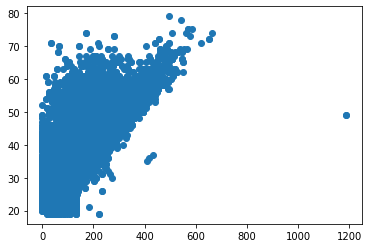

In [16]:
# Проверим зависимость опыта от возраста
plt.scatter(x=data['Опыт (двойное нажатие для полной версии)'], y=data['Возраст'])

In [17]:
# Возьмем всё, что не более 700
data = data[data['Опыт (двойное нажатие для полной версии)'] < 700]
data

,Пол,Возраст,ЗП,Город,Занятость,График,Опыт (двойное нажатие для полной версии),Образование и ВУЗ,Ищет работу на должность
0,М,44,27000.0,малый или за пределами России город,полная занятость,полный день,73,среднее специальное,Старший администратор
1,М,42,60000.0,малый или за пределами России город,"частичная занятость, полная занятость","гибкий график, полный день",230,высшее,Старший IT инженер
2,М,45,65000.0,малый или за пределами России город,полная занятость,"полный день, удаленная работа",237,высшее,"Системный администратор, Системный инженер"
3,М,44,70000.0,Москва,полная занятость,"гибкий график, полный день, удаленная работа",69,высшее,"Web-программист, Web-администратор, Web-мастер"
4,М,41,45000.0,малый или за пределами России город,"частичная занятость, полная занятость","полный день, сменный график",161,высшее,Старший системный администратор \ начальник от...
...,...,...,...,...,...,...,...,...,...
66940,М,24,50000.0,малый или за пределами России город,"частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",12,среднее образование,Программист Python
66941,М,28,120000.0,Москва,полная занятость,полный день,93,высшее,Руководитель отдела по работе с ключевыми клие...
66942,М,56,80000.0,Санкт-Петербург,"частичная занятость, проектная работа, полная ...","гибкий график, полный день, удаленная работа",414,высшее,программист
66943,Ж,33,70000.0,Самара,полная занятость,полный день,110,высшее,Руководитель проектов


Сравним на сколько уменьшилась база с учетом удаленных выбросов

In [18]:
print(len(data_check), len(data))

66945 60470


### 2. На занятии не рассматривалась статистика людей, которые могли не указать пол. Проанализируйте, какие поля наиболее часто встречаются у таких лиц, какая средняя зарплата и другие показатели?


In [19]:
data['Пол'].unique()

array(['М', 'Ж', 'Не указан'], dtype=object)

In [20]:
data['Пол'].value_counts()

М            48485
Ж            10498
Не указан     1487
Name: Пол, dtype: int64

Данных, которые не указали "Пол", примерно 3%

In [21]:
data_pol = data[data['Пол']=='Не указан']

In [22]:
data_pol

,Пол,Возраст,ЗП,Город,Занятость,График,Опыт (двойное нажатие для полной версии),Образование и ВУЗ,Ищет работу на должность
41,Не указан,33,75000.0,малый или за пределами России город,"проектная работа, полная занятость","гибкий график, полный день, сменный график, уд...",113,высшее,Ведущий системный администратор \ Системный ад...
81,Не указан,43,150000.0,малый или за пределами России город,полная занятость,полный день,222,высшее,"Менеджер проектов, аналитик, руководитель отде..."
103,Не указан,48,260000.0,малый или за пределами России город,полная занятость,полный день,257,высшее,CIO/CTO/IT director/Project Manager
114,Не указан,30,59500.0,малый или за пределами России город,"проектная работа, полная занятость","полный день, сменный график, удаленная работа",63,высшее,IT engineer
128,Не указан,49,400000.0,малый или за пределами России город,полная занятость,полный день,284,высшее,IT Director/IT manager
...,...,...,...,...,...,...,...,...,...
66650,Не указан,25,162500.0,малый или за пределами России город,"частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",33,высшее,Python/Django Разработчик
66746,Не указан,27,100000.0,малый или за пределами России город,"частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",33,высшее,Data scientist / Analyst
66765,Не указан,32,35000.0,малый или за пределами России город,полная занятость,"полный день, сменный график",88,высшее,Technical support specialist
66805,Не указан,35,195000.0,малый или за пределами России город,"стажировка, частичная занятость, проектная раб...",удаленная работа,153,высшее,Senior Software Developer


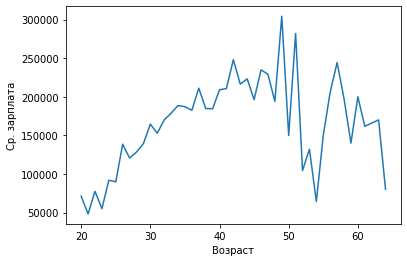

In [23]:
# Средняя ЗП от возраста
data_pol.groupby('Возраст')['ЗП'].mean().plot()
plt.xlabel('Возраст')
plt.ylabel('Ср. зарплата')
plt.show()


In [ ]:
# Посмотрим на какие должности больше всего не указан пол
data_pol['Ищет работу на должность'].value_counts()

In [ ]:
import seaborn as sns
# Посмотрим на зависимость возраста от ЗП с разбивкой по городам
sns.lmplot(data = data_pol, x = 'Возраст', y='ЗП', hue="Город", palette="Set1", 
           fit_reg=False)
plt.show()

## 3. Возьмите базу с занятия и посмотрите, сколько в среднем запрашивают разработчики Java, Python, C++.


Java

In [ ]:
# Запишем в переменную data_java все должности которые содержат слово java
data_java = data[data['Ищет работу на должность'].str.lower().str.\
     contains('java')]

# Отресуем график зависимости ЗП от Опыта
plt.scatter(x=data_java['ЗП'], y=data_java['Опыт (двойное нажатие для полной версии)'])

In [ ]:
# Средняя зарплата java разработчика
round(data_java['ЗП'].mean())

**Python**

In [ ]:
# Запишем в переменную data_java все должности которые содержат слово java
data_python = data[data['Ищет работу на должность'].str.lower().str.\
     contains('python')]

# Отресуем график зависимости ЗП от Опыта
plt.scatter(x=data_python['ЗП'], y=data_python['Опыт (двойное нажатие для полной версии)'], c='black')

In [ ]:
# Средняя зарплата python разработчика
round(data_python['ЗП'].mean())

**C++**

In [ ]:
# Запишем в переменную data_java все должности которые содержат слово java
data_ci = data[data['Ищет работу на должность'].str.lower().str.\
     contains('c+')]

# Отресуем график зависимости ЗП от Опыта
plt.scatter(x=data_ci['ЗП'], y=data_ci['Опыт (двойное нажатие для полной версии)'], c='green')

In [ ]:
# Средняя зарплата C++ разработчика
round(data_ci['ЗП'].mean())

# Задание Pro
Возьмите базу квартир (moscow_parsed_simple.csv). Проведите парсинг и очистку данных. Проанализируйте зависимость стоимости квартир от различных параметров (количество комнат, станции метро, и т.д.). Постройте графики. Переведите все параметры в числовой формат и рассчитайте корреляцию. Напишите выводы.

## Парсинг из прошлого задания

In [ ]:
# Загружаем базу
df = pd.read_csv('moscow_parsed_simple.csv', index_col=0)
df

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Комнат,Метро / ЖД станции,От станции,Дом,Балкон,Санузел,Площадь,"Цена, руб.",ГРМ,Бонус агенту,Дата,Кол-во дней в экспозиции
0,1,Шелепиха м.,12п,35/37 М,NaN,2,64.1/23/20,19500000.0,NaN,NaN,25.07.2019,1.0
1,1,Пятницкое шоссе м.,30т,11/14 П,Л,Р,38.4/17/9,4800000.0,NaN,NaN,25.07.2019,2.0
2,1,Планерная м.,5т,11/22 П,Б,С,38.2/19.9/9.9,7990000.0,NaN,NaN,25.07.2019,4.0
3,1,Шаболовская м.,12п,8/12 ?,Б,Р,38/15/7,11200000.0,NaN,NaN,25.07.2019,7.0
4,1,Бабушкинская м.,15п,4/14 П,NaN,С,34/17/8,6250000.0,NaN,NaN,25.07.2019,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...
126263,Ст,Некрасовка м.,4п,2/17 П,NaN,NaN,19.8/?/?,2850000.0,NaN,NaN,12.07.2019,14.0
126264,Ст,Авиамоторная м.,6п,2/8 К,NaN,С,20.4/18/?,3839990.0,NaN,NaN,23.07.2019,14.0
126265,Ст,Коломенская м.,15п,1/9 П,NaN,NaN,15.4/13.2/?,2900000.0,NaN,NaN,12.07.2019,14.0
126266,Ст,Алтуфьево м.,5т,4/9 М,NaN,NaN,26/10.9/7,5200000.0,NaN,NaN,22.07.2019,14.0


**1. Убираем строки "Для заметок"**

In [ ]:
df = df[df['Комнат'] != 'Для заметок:'] # Оставляем в таблице только те строки, у которых в графе "Комант" нет записи "Для заметок"
df # Смотрим результат

,Комнат,Метро / ЖД станции,От станции,Дом,Балкон,Санузел,Площадь,"Цена, руб.",ГРМ,Бонус агенту,Дата,Кол-во дней в экспозиции
0,1,Шелепиха м.,12п,35/37 М,NaN,2,64.1/23/20,19500000.0,NaN,NaN,25.07.2019,1.0
1,1,Пятницкое шоссе м.,30т,11/14 П,Л,Р,38.4/17/9,4800000.0,NaN,NaN,25.07.2019,2.0
2,1,Планерная м.,5т,11/22 П,Б,С,38.2/19.9/9.9,7990000.0,NaN,NaN,25.07.2019,4.0
3,1,Шаболовская м.,12п,8/12 ?,Б,Р,38/15/7,11200000.0,NaN,NaN,25.07.2019,7.0
4,1,Бабушкинская м.,15п,4/14 П,NaN,С,34/17/8,6250000.0,NaN,NaN,25.07.2019,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...
126263,Ст,Некрасовка м.,4п,2/17 П,NaN,NaN,19.8/?/?,2850000.0,NaN,NaN,12.07.2019,14.0
126264,Ст,Авиамоторная м.,6п,2/8 К,NaN,С,20.4/18/?,3839990.0,NaN,NaN,23.07.2019,14.0
126265,Ст,Коломенская м.,15п,1/9 П,NaN,NaN,15.4/13.2/?,2900000.0,NaN,NaN,12.07.2019,14.0
126266,Ст,Алтуфьево м.,5т,4/9 М,NaN,NaN,26/10.9/7,5200000.0,NaN,NaN,22.07.2019,14.0


In [ ]:
df = df.reset_index(drop = True) # Переназначем индекс с удалением предыдущего индекса
df # Смотрим результат

,Комнат,Метро / ЖД станции,От станции,Дом,Балкон,Санузел,Площадь,"Цена, руб.",ГРМ,Бонус агенту,Дата,Кол-во дней в экспозиции
0,1,Шелепиха м.,12п,35/37 М,NaN,2,64.1/23/20,19500000.0,NaN,NaN,25.07.2019,1.0
1,1,Пятницкое шоссе м.,30т,11/14 П,Л,Р,38.4/17/9,4800000.0,NaN,NaN,25.07.2019,2.0
2,1,Планерная м.,5т,11/22 П,Б,С,38.2/19.9/9.9,7990000.0,NaN,NaN,25.07.2019,4.0
3,1,Шаболовская м.,12п,8/12 ?,Б,Р,38/15/7,11200000.0,NaN,NaN,25.07.2019,7.0
4,1,Бабушкинская м.,15п,4/14 П,NaN,С,34/17/8,6250000.0,NaN,NaN,25.07.2019,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...
126263,Ст,Некрасовка м.,4п,2/17 П,NaN,NaN,19.8/?/?,2850000.0,NaN,NaN,12.07.2019,14.0
126264,Ст,Авиамоторная м.,6п,2/8 К,NaN,С,20.4/18/?,3839990.0,NaN,NaN,23.07.2019,14.0
126265,Ст,Коломенская м.,15п,1/9 П,NaN,NaN,15.4/13.2/?,2900000.0,NaN,NaN,12.07.2019,14.0
126266,Ст,Алтуфьево м.,5т,4/9 М,NaN,NaN,26/10.9/7,5200000.0,NaN,NaN,22.07.2019,14.0


**2. Удаляем столбцы "Примечание" и "ГРМ"**

In [ ]:
del df['ГРМ'] # Удаляем "ГРМ"

In [ ]:
df # Смотрим результат

,Комнат,Метро / ЖД станции,От станции,Дом,Балкон,Санузел,Площадь,"Цена, руб.",Бонус агенту,Дата,Кол-во дней в экспозиции
0,1,Шелепиха м.,12п,35/37 М,NaN,2,64.1/23/20,19500000.0,NaN,25.07.2019,1.0
1,1,Пятницкое шоссе м.,30т,11/14 П,Л,Р,38.4/17/9,4800000.0,NaN,25.07.2019,2.0
2,1,Планерная м.,5т,11/22 П,Б,С,38.2/19.9/9.9,7990000.0,NaN,25.07.2019,4.0
3,1,Шаболовская м.,12п,8/12 ?,Б,Р,38/15/7,11200000.0,NaN,25.07.2019,7.0
4,1,Бабушкинская м.,15п,4/14 П,NaN,С,34/17/8,6250000.0,NaN,25.07.2019,11.0
...,...,...,...,...,...,...,...,...,...,...,...
126263,Ст,Некрасовка м.,4п,2/17 П,NaN,NaN,19.8/?/?,2850000.0,NaN,12.07.2019,14.0
126264,Ст,Авиамоторная м.,6п,2/8 К,NaN,С,20.4/18/?,3839990.0,NaN,23.07.2019,14.0
126265,Ст,Коломенская м.,15п,1/9 П,NaN,NaN,15.4/13.2/?,2900000.0,NaN,12.07.2019,14.0
126266,Ст,Алтуфьево м.,5т,4/9 М,NaN,NaN,26/10.9/7,5200000.0,NaN,22.07.2019,14.0


**3. Для столбца "Балкон" вместо Nan-значений создаем категорию "Отсутсвует"**

In [ ]:
df.loc[df['Балкон'].isna(), 'Балкон'] = 'Отсутствует'
df # Смотрим результат

,Комнат,Метро / ЖД станции,От станции,Дом,Балкон,Санузел,Площадь,"Цена, руб.",Бонус агенту,Дата,Кол-во дней в экспозиции
0,1,Шелепиха м.,12п,35/37 М,Отсутствует,2,64.1/23/20,19500000.0,NaN,25.07.2019,1.0
1,1,Пятницкое шоссе м.,30т,11/14 П,Л,Р,38.4/17/9,4800000.0,NaN,25.07.2019,2.0
2,1,Планерная м.,5т,11/22 П,Б,С,38.2/19.9/9.9,7990000.0,NaN,25.07.2019,4.0
3,1,Шаболовская м.,12п,8/12 ?,Б,Р,38/15/7,11200000.0,NaN,25.07.2019,7.0
4,1,Бабушкинская м.,15п,4/14 П,Отсутствует,С,34/17/8,6250000.0,NaN,25.07.2019,11.0
...,...,...,...,...,...,...,...,...,...,...,...
126263,Ст,Некрасовка м.,4п,2/17 П,Отсутствует,NaN,19.8/?/?,2850000.0,NaN,12.07.2019,14.0
126264,Ст,Авиамоторная м.,6п,2/8 К,Отсутствует,С,20.4/18/?,3839990.0,NaN,23.07.2019,14.0
126265,Ст,Коломенская м.,15п,1/9 П,Отсутствует,NaN,15.4/13.2/?,2900000.0,NaN,12.07.2019,14.0
126266,Ст,Алтуфьево м.,5т,4/9 М,Отсутствует,NaN,26/10.9/7,5200000.0,NaN,22.07.2019,14.0


**4. Значения столбца "Бонус агенту" переводим в тысячи рублей, остальный значения заполняем нулями**

In [ ]:
df.loc[df['Бонус агенту'].isna(), 'Бонус агенту'] = 0 # Зададим значение 0 для Nan-значений

In [ ]:
bonus = df['Бонус агенту'] # Возьмем столбец "Бонус агенту"
cost = df['Цена, руб.']    # Возьмем столбец 'Цена, руб.'

In [ ]:
pd.options.mode.chained_assignment = None # Отключаем warnings

for i in range(bonus.shape[0]): # Пройдем по всем значениям столбца "Бонус агенту"

  if isinstance(bonus[i], str) and bonus[i].find('руб.') != -1: # Если значение является строкой (не 0, где раньше был Nan) и в
                                                                # нем есть подстрока 'руб.', значит в столбце явно указана сумма ганорара 
    bonus[i] = bonus[i][:bonus[i].find('руб.')] # Оставляем только численное значение ганорара 
    bonus[i] = bonus[i].replace(' ', '') # Удаляем пробелы,
    bonus[i] = float(bonus[i])           # Переводим в float
    bonus[i] = bonus[i] / 1000           # Делим на 1000

  elif isinstance(bonus[i], str) and bonus[i].find('%') != -1: # Если значение является строкой (не 0, где раньше был Nan) и в
                                                               # нем есть подстрока '%', значит в столбце ганорар указан в процентах от сделки
    bonus[i] = bonus[i][:bonus[i].find('%')] # Оставляем только процентное значение ганорара 
    bonus[i] = bonus[i].replace(' ', '')     # Удаляем пробелы,
    bonus[i] = float(bonus[i])               # Переводим в float
    bonus[i] = bonus[i] / 100                # Делим на 100 (так как это проценты)
    bonus[i] = bonus[i] * cost[i]            # Умножаем на значение сделки
    bonus[i] = bonus[i] / 1000               # Делим на 1000
    
df['Бонус агенту'] = bonus # Сформированный массив присваиваем к столбцу
df # Смотрим результат

,Комнат,Метро / ЖД станции,От станции,Дом,Балкон,Санузел,Площадь,"Цена, руб.",Бонус агенту,Дата,Кол-во дней в экспозиции
0,1,Шелепиха м.,12п,35/37 М,Отсутствует,2,64.1/23/20,19500000.0,0,25.07.2019,1.0
1,1,Пятницкое шоссе м.,30т,11/14 П,Л,Р,38.4/17/9,4800000.0,0,25.07.2019,2.0
2,1,Планерная м.,5т,11/22 П,Б,С,38.2/19.9/9.9,7990000.0,0,25.07.2019,4.0
3,1,Шаболовская м.,12п,8/12 ?,Б,Р,38/15/7,11200000.0,0,25.07.2019,7.0
4,1,Бабушкинская м.,15п,4/14 П,Отсутствует,С,34/17/8,6250000.0,0,25.07.2019,11.0
...,...,...,...,...,...,...,...,...,...,...,...
126263,Ст,Некрасовка м.,4п,2/17 П,Отсутствует,NaN,19.8/?/?,2850000.0,0,12.07.2019,14.0
126264,Ст,Авиамоторная м.,6п,2/8 К,Отсутствует,С,20.4/18/?,3839990.0,0,23.07.2019,14.0
126265,Ст,Коломенская м.,15п,1/9 П,Отсутствует,NaN,15.4/13.2/?,2900000.0,0,12.07.2019,14.0
126266,Ст,Алтуфьево м.,5т,4/9 М,Отсутствует,NaN,26/10.9/7,5200000.0,0,22.07.2019,14.0


In [ ]:
df.rename(columns={'Бонус агенту': 'Бонус агенту, тыс. руб.'}, inplace=True) # Даем новое название столбцу
df #Смотрим результат

,Комнат,Метро / ЖД станции,От станции,Дом,Балкон,Санузел,Площадь,"Цена, руб.","Бонус агенту, тыс. руб.",Дата,Кол-во дней в экспозиции
0,1,Шелепиха м.,12п,35/37 М,Отсутствует,2,64.1/23/20,19500000.0,0,25.07.2019,1.0
1,1,Пятницкое шоссе м.,30т,11/14 П,Л,Р,38.4/17/9,4800000.0,0,25.07.2019,2.0
2,1,Планерная м.,5т,11/22 П,Б,С,38.2/19.9/9.9,7990000.0,0,25.07.2019,4.0
3,1,Шаболовская м.,12п,8/12 ?,Б,Р,38/15/7,11200000.0,0,25.07.2019,7.0
4,1,Бабушкинская м.,15п,4/14 П,Отсутствует,С,34/17/8,6250000.0,0,25.07.2019,11.0
...,...,...,...,...,...,...,...,...,...,...,...
126263,Ст,Некрасовка м.,4п,2/17 П,Отсутствует,NaN,19.8/?/?,2850000.0,0,12.07.2019,14.0
126264,Ст,Авиамоторная м.,6п,2/8 К,Отсутствует,С,20.4/18/?,3839990.0,0,23.07.2019,14.0
126265,Ст,Коломенская м.,15п,1/9 П,Отсутствует,NaN,15.4/13.2/?,2900000.0,0,12.07.2019,14.0
126266,Ст,Алтуфьево м.,5т,4/9 М,Отсутствует,NaN,26/10.9/7,5200000.0,0,22.07.2019,14.0


In [ ]:
df.loc[df['Бонус агенту, тыс. руб.'] != 0, 'Бонус агенту, тыс. руб.'] # Посмотрим на ненулевые значения

152          10
304          10
319          10
388          50
456        70.5
          ...  
124244       20
124510        5
124753    10.15
125287      150
125843       50
Name: Бонус агенту, тыс. руб., Length: 1252, dtype: object

**5. Считаем в цикле суммарную площадь помещений**

In [ ]:
# Функция получения суммарной площади числа. На вход передаем строку столбца "Площадь". 
# В этом столбце попадаются записи, не соответсвующие формату, например, в некоторых ячейках имеется дата, хотя это столбец "Площадь"
# Суммарное значение площади может быть неизвестно. В этом случае будем вносить в таблицу 0

def parcer(strg):
  result = 0               # Создаем возвращаемую переменную и приравниваем к 0
  if strg.find('/') != -1: # Если в строке есть '/'
    strg = strg[:strg.find('/')]        # Берем все, что находится до него
    search=re.compile(r'[0-9.]').search # Создаем элемент для поиска недопустимых символов 
    if bool(search(strg)): # Проверяем наличие недопустимых символов. Если есть, то coorectSymbols = False, иначе True 
      result = float(strg) # Преобразуем в float

  return result # Возвращаем результат 

areas = df['Площадь']                 # Берем все записи в столбце "Площадь" 
finalAreas = []                       # Создаем новый список, в который будем добавлять площади
for i in range(areas.shape[0]):       # Проходим по всем строчкам столбца
  finalAreas.append(parcer(areas[i])) # Добавляем в список значение площади

df['Площадь'] = finalAreas # Меняем значения площадей помещений
df # Смотрим результат

,Комнат,Метро / ЖД станции,От станции,Дом,Балкон,Санузел,Площадь,"Цена, руб.","Бонус агенту, тыс. руб.",Дата,Кол-во дней в экспозиции
0,1,Шелепиха м.,12п,35/37 М,Отсутствует,2,64.1,19500000.0,0,25.07.2019,1.0
1,1,Пятницкое шоссе м.,30т,11/14 П,Л,Р,38.4,4800000.0,0,25.07.2019,2.0
2,1,Планерная м.,5т,11/22 П,Б,С,38.2,7990000.0,0,25.07.2019,4.0
3,1,Шаболовская м.,12п,8/12 ?,Б,Р,38.0,11200000.0,0,25.07.2019,7.0
4,1,Бабушкинская м.,15п,4/14 П,Отсутствует,С,34.0,6250000.0,0,25.07.2019,11.0
...,...,...,...,...,...,...,...,...,...,...,...
126263,Ст,Некрасовка м.,4п,2/17 П,Отсутствует,NaN,19.8,2850000.0,0,12.07.2019,14.0
126264,Ст,Авиамоторная м.,6п,2/8 К,Отсутствует,С,20.4,3839990.0,0,23.07.2019,14.0
126265,Ст,Коломенская м.,15п,1/9 П,Отсутствует,NaN,15.4,2900000.0,0,12.07.2019,14.0
126266,Ст,Алтуфьево м.,5т,4/9 М,Отсутствует,NaN,26.0,5200000.0,0,22.07.2019,14.0


**6. Отсутствующие значения в столбце "Санузел" меняем на "Нет данных"**

In [ ]:
df.loc[df['Санузел'].isna(), 'Санузел'] = 'Нет данных'
df # Смотрим результат

,Комнат,Метро / ЖД станции,От станции,Дом,Балкон,Санузел,Площадь,"Цена, руб.","Бонус агенту, тыс. руб.",Дата,Кол-во дней в экспозиции
0,1,Шелепиха м.,12п,35/37 М,Отсутствует,2,64.1,19500000.0,0,25.07.2019,1.0
1,1,Пятницкое шоссе м.,30т,11/14 П,Л,Р,38.4,4800000.0,0,25.07.2019,2.0
2,1,Планерная м.,5т,11/22 П,Б,С,38.2,7990000.0,0,25.07.2019,4.0
3,1,Шаболовская м.,12п,8/12 ?,Б,Р,38.0,11200000.0,0,25.07.2019,7.0
4,1,Бабушкинская м.,15п,4/14 П,Отсутствует,С,34.0,6250000.0,0,25.07.2019,11.0
...,...,...,...,...,...,...,...,...,...,...,...
126263,Ст,Некрасовка м.,4п,2/17 П,Отсутствует,Нет данных,19.8,2850000.0,0,12.07.2019,14.0
126264,Ст,Авиамоторная м.,6п,2/8 К,Отсутствует,С,20.4,3839990.0,0,23.07.2019,14.0
126265,Ст,Коломенская м.,15п,1/9 П,Отсутствует,Нет данных,15.4,2900000.0,0,12.07.2019,14.0
126266,Ст,Алтуфьево м.,5т,4/9 М,Отсутствует,Нет данных,26.0,5200000.0,0,22.07.2019,14.0


**7. Переводим значение столбца 'Цена, руб.' В тысячи**

In [ ]:
df['Цена, руб.'] = df['Цена, руб.'] / 1000

In [ ]:
df.rename(columns={'Цена, руб.': 'Цена, тыс. руб.'}, inplace=True) # Даем новое название столбцу
df # Смотрим результат

,Комнат,Метро / ЖД станции,От станции,Дом,Балкон,Санузел,Площадь,"Цена, тыс. руб.","Бонус агенту, тыс. руб.",Дата,Кол-во дней в экспозиции
0,1,Шелепиха м.,12п,35/37 М,Отсутствует,2,64.1,19500.00,0,25.07.2019,1.0
1,1,Пятницкое шоссе м.,30т,11/14 П,Л,Р,38.4,4800.00,0,25.07.2019,2.0
2,1,Планерная м.,5т,11/22 П,Б,С,38.2,7990.00,0,25.07.2019,4.0
3,1,Шаболовская м.,12п,8/12 ?,Б,Р,38.0,11200.00,0,25.07.2019,7.0
4,1,Бабушкинская м.,15п,4/14 П,Отсутствует,С,34.0,6250.00,0,25.07.2019,11.0
...,...,...,...,...,...,...,...,...,...,...,...
126263,Ст,Некрасовка м.,4п,2/17 П,Отсутствует,Нет данных,19.8,2850.00,0,12.07.2019,14.0
126264,Ст,Авиамоторная м.,6п,2/8 К,Отсутствует,С,20.4,3839.99,0,23.07.2019,14.0
126265,Ст,Коломенская м.,15п,1/9 П,Отсутствует,Нет данных,15.4,2900.00,0,12.07.2019,14.0
126266,Ст,Алтуфьево м.,5т,4/9 М,Отсутствует,Нет данных,26.0,5200.00,0,22.07.2019,14.0


## Исследуем базу

In [ ]:
# Увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5

sns.set(style='whitegrid', palette='muted')  # Включаем режим seaborn. Теперь даже методы от matplotlib будут отображаться в этом стиле. 
# whitegrid - белая сетка
# muted - палитра для отображения
#%config InlineBackend.figure_format = 'svg' 

**Какая стоимость однокомнатных квартир чаще всего встречается?**

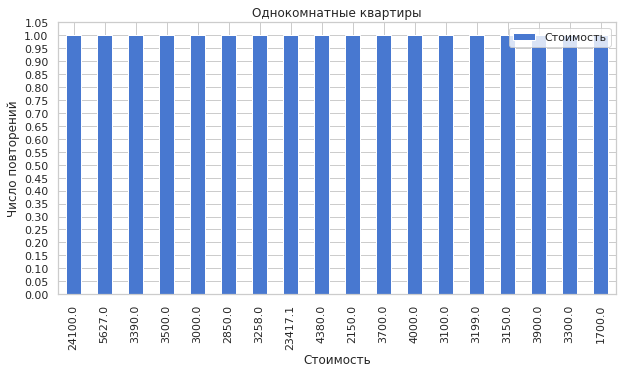

In [ ]:
plot = df[df['Комнат' ] == '1']['Цена, тыс. руб.'].value_counts().iloc[:25].plot(kind='bar', label='Стоимость')  # Первые 25 частых стоимостей однокомнатных квартир
plt.title('Однокомнатные квартиры') # Название графика
plot.locator_params(nbins=25)       # Указываем число бинов 

plt.xlabel('Стоимость') # Подпись оси x
plt.ylabel('Число повторений') # Подпись оси y
plt.legend() # Выводим легенду
plt.show()   # Показываем график

**Какая стоимость двухкомнатных квартир чаще всего встречается?**

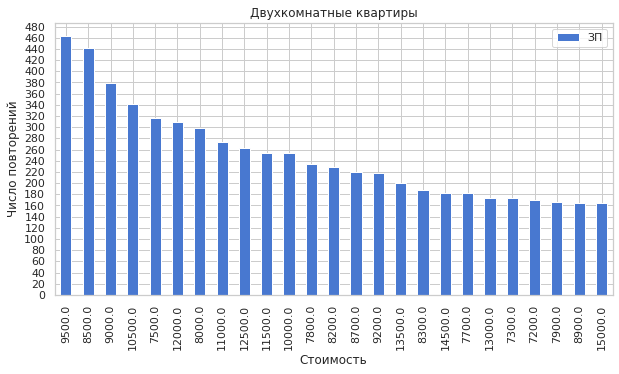

In [ ]:
plot = df[df['Комнат' ] == '2']['Цена, тыс. руб.'].value_counts().iloc[:25].plot(kind='bar', label='ЗП')   # Первые 25 частых стоимостей двухкомнатных квартир
plt.title('Двухкомнатные квартиры') # Задаем название графику 
plot.locator_params(nbins=25)       # Указываем число бинов   

plt.xlabel('Стоимость')             # Подпись оси x
plt.ylabel('Число повторений')      # Подпись оси y
plt.legend() # Выводим легенду
plt.show()   # Показываем график

**Какое число предложений есть по квартирам вблизи от различных станций метро?**

In [ ]:
# Посмотрим подробную информацию о всех доступных предложениях вблизи разных станций метро. Сортировка по количеству
df.groupby('Метро / ЖД станции')['Цена, тыс. руб.'].describe().sort_values(by='count', ascending=False) 

,count,mean,std,min,25%,50%,75%,max
Метро / ЖД станции,,,,,,,,
Селигерская м.,2877.0,7842.330332,2427.361861,1950.0,6359.12,7490.0000,9107.721,37358.733
Бунинская аллея м.,2668.0,6294.547910,2668.351741,1790.0,5100.00,5983.9705,7250.000,77000.000
Саларьево м.,2483.0,5933.138128,1849.794312,1500.0,4687.38,5855.2200,6696.399,42000.000
Некрасовка м.,2180.0,6130.445196,1554.529665,2150.0,5390.40,5659.3420,6867.084,15500.000
Домодедовская м.,1887.0,7214.317969,2071.386126,2050.0,6255.45,7187.7000,8100.000,14500.000
...,...,...,...,...,...,...,...,...
Кутузовская м. (МЦК),3.0,14566.666667,7724.204382,6000.0,11350.00,16700.0000,18850.000,21000.000
Внуково станция,3.0,6816.666667,1183.568052,5450.0,6475.00,7500.0000,7500.000,7500.000
Колхозная станция,2.0,4250.000000,70.710678,4200.0,4225.00,4250.0000,4275.000,4300.000


**Какая средняя стоимость квартир вблизи от различных станций метро?**

In [ ]:
# Посмотрим подробную информацию о всех доступных предложениях вблизи разных станций метро. Сортировка по средней цене
df.groupby('Метро / ЖД станции')['Цена, тыс. руб.'].describe().sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Метро / ЖД станции,,,,,,,,
Баррикадная м.,349.0,311286.236072,485726.134674,3000.0,17000.00,77000.00,450000.000,2304000.000
Парк культуры м.,539.0,275855.431128,284075.569385,2600.0,49500.00,190000.00,347139.104,1451672.576
Кропоткинская м.,535.0,219237.216299,238337.228552,5150.0,82086.03,130000.00,280633.800,1893870.000
Октябрьская м.,148.0,216798.653534,211088.263564,8000.0,29410.75,225306.32,319185.750,946935.000
Полянка м.,275.0,211626.089647,182924.014058,4500.0,76400.00,170000.00,243101.550,1131598.800
...,...,...,...,...,...,...,...,...
Бекасово-1 станция,48.0,3966.458333,797.083753,2000.0,3437.50,4000.00,4500.000,5500.000
Львовская станция,10.0,3961.000000,821.062320,2900.0,3500.00,3705.00,4850.000,4900.000
Рассудово станция,92.0,3644.217391,794.157966,2350.0,2998.75,3650.00,3900.000,6150.000


**Наглядное представление о количестве предложений вблизи от станций метро**

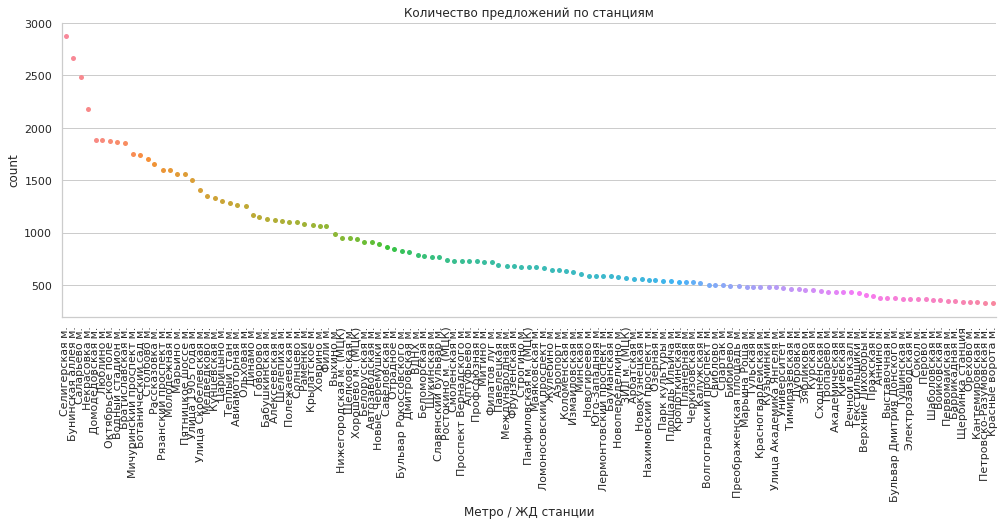

In [ ]:
# Построим scatter зависимости количества предложений по станциям
plot = sns.catplot(x='Метро / ЖД станции', y='count', data=df.groupby('Метро / ЖД станции')['Цена, тыс. руб.'].describe().sort_values(by='count', ascending=False).iloc[:125].reset_index(), height=5, aspect=3);
plt.xticks(rotation=90) # Поворачиваем подписи метро на 90 градусов

plt.title('Количество предложений по станциям') # Подпись графика
plt.show() # Показываем график

**Наглядное представление о средней цене квартир вблизи от станций метро**

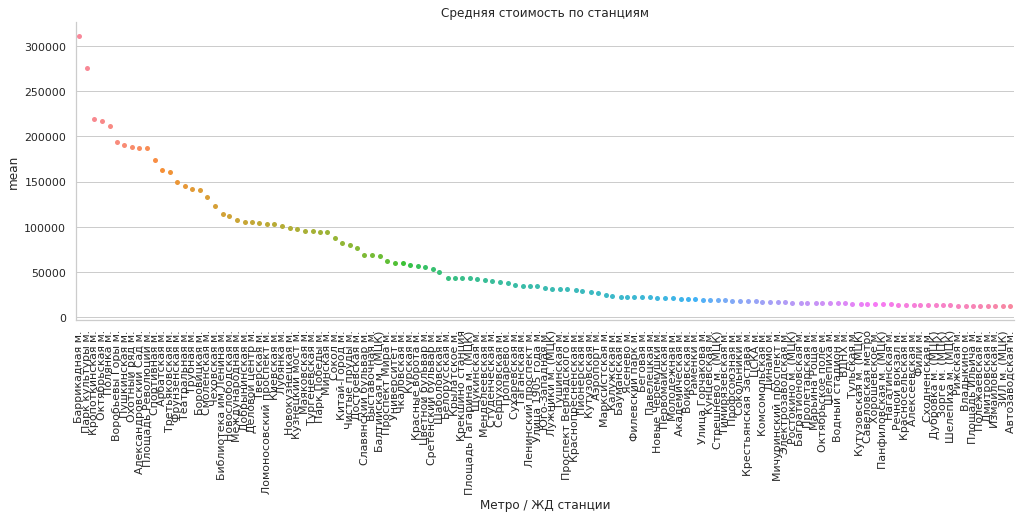

In [ ]:
# Построим scatter зависимости стоимости от цены
plot = sns.catplot(x='Метро / ЖД станции', y='mean', data=df.groupby('Метро / ЖД станции')['Цена, тыс. руб.'].describe().sort_values(by='mean', ascending=False).iloc[:125].reset_index(), height=5, aspect=3);
plt.xticks(rotation=90) # Поворачиваем подписи метро на 90 градусов

plt.title('Средняя стоимость по станциям') # Подпись графика
plt.show() # Показываем график

**Как зависит средняя цена квартиры от числа предложений**

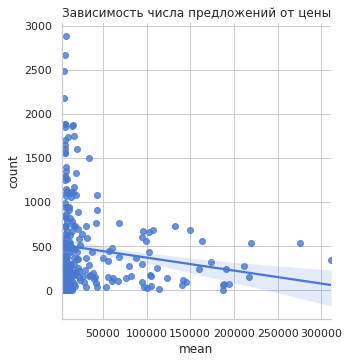

In [ ]:
# Построим зависимость числа предложений от цены
sns.lmplot(data = df.groupby('Метро / ЖД станции')['Цена, тыс. руб.'].describe().sort_values(by='mean', ascending=False).reset_index(), x = 'mean', y='count')
plt.title('Зависимость числа предложений от цены')
plt.show()

**Как влияет наличие балкона на стоимость?**

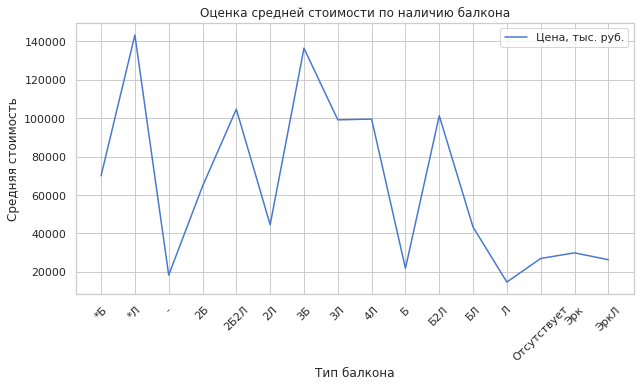

In [ ]:
# Группируем по наличию балкона
# Целевая переменная - 'Цена, тыс. руб.', находим среднее значение для каждой станции
data = df.groupby('Балкон')['Цена, тыс. руб.'].mean() # Средняя стоимость для квартир, разбитых на группы по типам балконов 
data.plot() # Рисуем график

xticksList = data.index.values # Определяем список значений для оси x
plt.xticks(np.arange(xticksList.shape[0]), xticksList, rotation=45) # Переходим от численных подписей к категориальным. Поворачиваем текст на 45 градусов, чтобы подписи не заходили друг на друга
plt.xlabel('Тип балкона') # Подпись оси x
plt.ylabel('Средняя стоимость') # Подпись оси y
plt.title('Оценка средней стоимости по наличию балкона') # Подпись графика
plt.legend() # Выводим легенду
plt.show()   # Показываем график

**Как влияет наличие санузла на стоимость?**

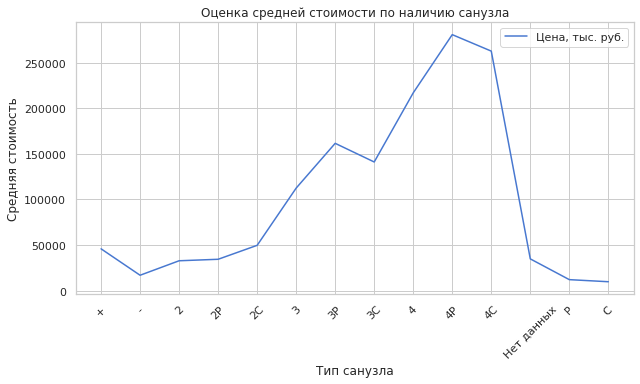

In [ ]:
# Группируем по наличию санузла
# Целевая переменная - 'Цена, руб.', находим среднее значение для каждой станции
data = df.groupby('Санузел')['Цена, тыс. руб.'].mean() # Средняя стоимость для квартир, разбитых на группы по типам санузлов 
data.plot() # Рисуем график

xticksList = data.index.values  # Определяем список значений для оси x
plt.xticks(np.arange(xticksList.shape[0]), xticksList, rotation=45) # Переходим от численных подписей к категориальным. Поворачиваем текст на 45 градусов, чтобы подписи не заходили друг на друга
plt.xlabel('Тип санузла')       # Подпись оси x
plt.ylabel('Средняя стоимость') # Подпись оси y

plt.title('Оценка средней стоимости по наличию санузла') # Подпись графика
plt.legend() # Подпись графика
plt.show()   # Показываем график

**Как площадь вляет на стоимость?**

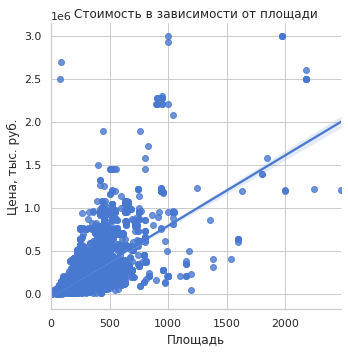

In [ ]:
# Построим scatter зависимости площади от цены
sns.lmplot(data = df, x = 'Площадь', y='Цена, тыс. руб.')
plt.title('Стоимость в зависимости от площади')
plt.show()

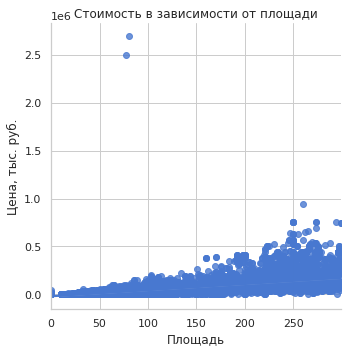

In [ ]:
# Построим scatter зависимости площади от цены для квартир до 300 кв. м
sns.lmplot(data = df[df['Площадь'] < 300], x = 'Площадь', y='Цена, тыс. руб.')
plt.title('Стоимость в зависимости от площади')
plt.show()

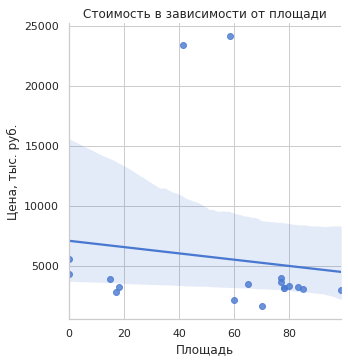

In [ ]:
# Построим scatter зависимости площади от цены однокомнатных квартир площадью до 250 кв. м
sns.lmplot(data = df[(df['Площадь'] < 250) & (df['Комнат'] == '1')], x = 'Площадь', y='Цена, тыс. руб.')
plt.title('Стоимость в зависимости от площади')
plt.show()

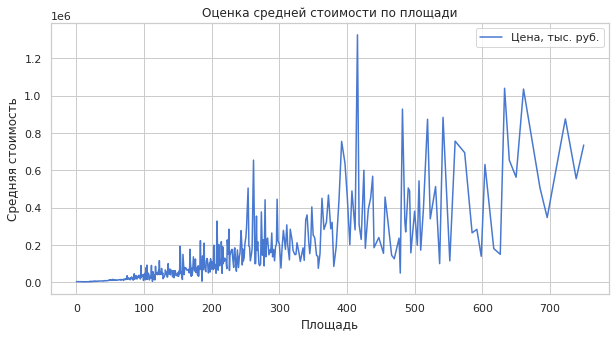

In [ ]:
# Группируем по площади
# Целевая переменная - 'Цена, тыс. руб.', находим среднее значение для каждой станции
df.groupby('Площадь')['Цена, тыс. руб.'].mean()[:750:5].plot() # Средняя стоимость для квартир от площади для для площадей от 0 до 750
                                                    
plt.xlabel('Площадь')           # Подпись оси x
plt.ylabel('Средняя стоимость') # Подпись оси y
plt.title('Оценка средней стоимости по площади') # Подпись графика
plt.legend() # Выводим легенду
plt.show()   # Показываем график

**Допустим, нас интересуют предложения на станции метро "Курская". Какие частые цены на этой станции?**

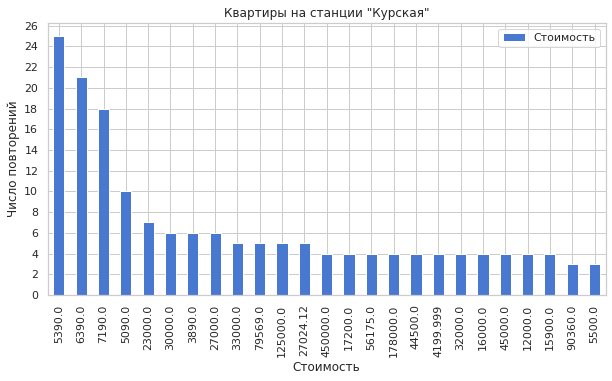

In [ ]:
plot = df[df['Метро / ЖД станции'] == 'Курская м.']['Цена, тыс. руб.'].value_counts().iloc[:25].plot(kind='bar', label='Стоимость')  # Первые 25 стоимостей квартир на станции метро "Курская"
plt.title('Квартиры на станции "Курская"') # Подпись графика
plot.locator_params(nbins=25)  # Число бинов    
plt.xlabel('Стоимость')        # Подпись оси x
plt.ylabel('Число повторений') # Подпись оси y
plt.legend() # Выводим легенду     
plt.show()   # Показываем график

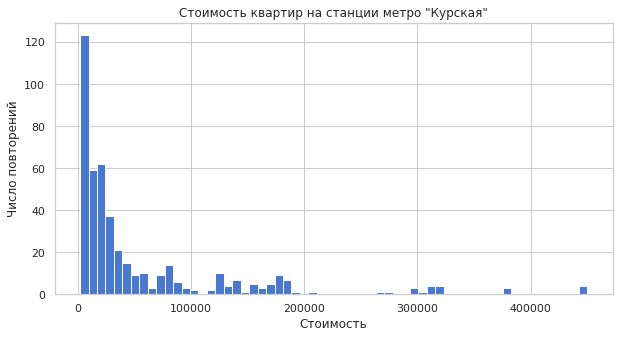

In [ ]:
plt.hist(df[(df['Метро / ЖД станции'] == 'Курская м.') & (df['Цена, тыс. руб.'] < 1000000)]['Цена, тыс. руб.'].sort_values(ascending=False) , bins=60) # Гистограмма самых частых стоимостей для квартир на станции метро "Курская"
plt.title('Стоимость квартир на станции метро "Курская"')
plt.xlabel('Стоимость')        # Подпись оси x
plt.ylabel('Число повторений') # Подпись оси y
plt.show() # Показываем график

In [ ]:
df

,Комнат,Метро / ЖД станции,От станции,Дом,Балкон,Санузел,Площадь,"Цена, тыс. руб.","Бонус агенту, тыс. руб.",Дата,Кол-во дней в экспозиции
0,1,Шелепиха м.,12п,35/37 М,Отсутствует,2,64.1,19500.00,0,25.07.2019,1.0
1,1,Пятницкое шоссе м.,30т,11/14 П,Л,Р,38.4,4800.00,0,25.07.2019,2.0
2,1,Планерная м.,5т,11/22 П,Б,С,38.2,7990.00,0,25.07.2019,4.0
3,1,Шаболовская м.,12п,8/12 ?,Б,Р,38.0,11200.00,0,25.07.2019,7.0
4,1,Бабушкинская м.,15п,4/14 П,Отсутствует,С,34.0,6250.00,0,25.07.2019,11.0
...,...,...,...,...,...,...,...,...,...,...,...
126263,Ст,Некрасовка м.,4п,2/17 П,Отсутствует,Нет данных,19.8,2850.00,0,12.07.2019,14.0
126264,Ст,Авиамоторная м.,6п,2/8 К,Отсутствует,С,20.4,3839.99,0,23.07.2019,14.0
126265,Ст,Коломенская м.,15п,1/9 П,Отсутствует,Нет данных,15.4,2900.00,0,12.07.2019,14.0
126266,Ст,Алтуфьево м.,5т,4/9 М,Отсутствует,Нет данных,26.0,5200.00,0,22.07.2019,14.0


In [ ]:
df['Комнат'].unique()

array([1.0, nan, 2.0, '2', '5', '6', '7', '8', '10', '9', '14', '13',
       '11', '15', '16', '12', '20', '30', '01.мар', '02.апр', '01.апр',
       '01.янв', '03.май', '01.фев', '02.мар', '01.июн', '01.авг',
       '03.апр', '01.май', '02.май', '01.сен', '01.июл', '02.июл',
       '03.июн', '05.июн', '03.авг', '01.окт', '04.май', '02.июн',
       '04.июн', '01.дек', '1', '4', '03.июл', '02.фев', '03.мар', 'Ст'],
      dtype=object)

In [ ]:
# Удалим нулевые значения
df = df.dropna(subset=['Комнат'])

In [ ]:
df['Комнат'].unique()

array([1.0, 2.0, '2', '5', '6', '7', '8', '10', '9', '14', '13', '11',
       '15', '16', '12', '20', '30', '01.мар', '02.апр', '01.апр',
       '01.янв', '03.май', '01.фев', '02.мар', '01.июн', '01.авг',
       '03.апр', '01.май', '02.май', '01.сен', '01.июл', '02.июл',
       '03.июн', '05.июн', '03.авг', '01.окт', '04.май', '02.июн',
       '04.июн', '01.дек', '1', '4', '03.июл', '02.фев', '03.мар', 'Ст'],
      dtype=object)

In [ ]:
df2 = df.copy()

In [ ]:
df = df2

In [ ]:
df

,Комнат,Метро / ЖД станции,От станции,Дом,Балкон,Санузел,Площадь,"Цена, тыс. руб.","Бонус агенту, тыс. руб.",Дата,Кол-во дней в экспозиции
0,1,Шелепиха м.,12п,35/37 М,Отсутствует,2,64.1,19500.00,0,25.07.2019,1.0
1,1,Пятницкое шоссе м.,30т,11/14 П,Л,Р,38.4,4800.00,0,25.07.2019,2.0
2,1,Планерная м.,5т,11/22 П,Б,С,38.2,7990.00,0,25.07.2019,4.0
3,1,Шаболовская м.,12п,8/12 ?,Б,Р,38.0,11200.00,0,25.07.2019,7.0
4,1,Бабушкинская м.,15п,4/14 П,Отсутствует,С,34.0,6250.00,0,25.07.2019,11.0
...,...,...,...,...,...,...,...,...,...,...,...
126263,Ст,Некрасовка м.,4п,2/17 П,Отсутствует,Нет данных,19.8,2850.00,0,12.07.2019,14.0
126264,Ст,Авиамоторная м.,6п,2/8 К,Отсутствует,С,20.4,3839.99,0,23.07.2019,14.0
126265,Ст,Коломенская м.,15п,1/9 П,Отсутствует,Нет данных,15.4,2900.00,0,12.07.2019,14.0
126266,Ст,Алтуфьево м.,5т,4/9 М,Отсутствует,Нет данных,26.0,5200.00,0,22.07.2019,14.0


In [ ]:
# Меняем значение Ст на 1
df['Комнат'][df['Комнат']=='Ст'] = 1

In [ ]:
# Оставим только числовые значения
df = df[pd.to_numeric(df['Комнат'], errors='coerce').notnull()]
df['Дом'].unique()

array(['35/37 М', '11/14 П', '11/22 П', ..., '54/65 М', '3/53 М-К',
       '52/73 П'], dtype=object)

In [ ]:
# Переводим все в int
df['Комнат'] = df['Комнат'].astype(float)
df['Комнат'] = df['Комнат'].astype(int)

In [ ]:
df['Кол-во дней в экспозиции'].value_counts()

2.0      6502
3.0      6094
1.0      5256
4.0      4781
5.0      3676
         ... 
903.0       1
635.0       1
705.0       1
703.0       1
842.0       1
Name: Кол-во дней в экспозиции, Length: 907, dtype: int64

## Приводим данные к категориальным

In [ ]:
# Количество комнат превращаем в классы
def getParameterRoom(arg):
  out = int(arg)
  outClass = 0 # Индекс по умолчанию
  if (out == 1):
    outClass = 1
  if (out == 2):
    outClass = 2
  if (out == 3):
    outClass = 3
  if (out == 4):
    outClass = 4
  if (out == 5):
    outClass = 5
  if (out > 5):
    outClass = 6
  if (out > 10):
    outClass = 7

  # На выходе получаем вектор с нужной категорией комнат
  return list(utils.to_categorical(outClass, 8).astype('int'))

# Данные от станции
def getParameterStation(arg):
  arg = str(arg)
  out = 0 
  if 'п' in arg:          
    out = 1
  elif 'т' in arg: 
    out = 2
  return list(utils.to_categorical(out, 3).astype('int'))

# Категориальные Балкон
def getParameterBalcon(arg):
  outClass = 0    # по умолчанию 0
  if (arg == 'Л'):   # если лоджия
    outClass = 1
  if (arg == 'Б'):   # если 1 балкон
    outClass = 2
  if (arg == '2Л'):  # если 2 лоджии
    outClass = 3
  if (arg == '2Б'):  # если 2 балкона
    outClass = 4
  if (arg == '3Л'):  # если 3 лоджии
    outClass = 5
  if (arg == '3Б'):  # если 3 балкона
    outClass = 6
  if (arg == '2Б2Л'): # если 2 балкона и 2 лоджии
    outClass = 7
  if (arg == '4Л'): # если 4 лоджии
    outClass = 8
  if (arg == 'Б2Л'): # если балкон и 2 лоджии
    outClass = 9 
  if (arg == 'Эрк'): # если эрк
    outClass = 10
  
  return list(utils.to_categorical(outClass, 11).astype('int'))

# Данные о Санузлах
def getParameterWC(arg):
  out = str(arg)
  outClass = 0    # по умолчанию 0
  if (out == 'С') or (out == '1'):   # если лоджия
    outClass = 1
  if (out == 'Р') or (out == '+'):   # если 1 балкон
    outClass = 2
  if (out == '2С') or (out == '2'):  # если 2 лоджии
    outClass = 3
  if (out == '2Р'):  # если 2 лоджии
    outClass = 4
  if (out == '3С') or (out == '3'):  # если 2 лоджии
    outClass = 5
  if (out == '3Р'):  # если 2 лоджии
    outClass = 6
  if (out == '4С') or (out == '4'):  # если 2 лоджии
    outClass = 7
  if (out == '4Р'):  # если 2 лоджии
    outClass = 8
  return list(utils.to_categorical(outClass, 9).astype('int'))

# Данные о Площади
def getParameterArea(arg):
  arg = float(arg)
  out = 0 
  if (arg < 25):          
    out = 1
  elif (arg < 50): 
    out = 2
  elif (arg < 75):
    out = 3
  elif (arg < 100):
    out = 4
  elif (arg > 100):
    out = 5

  return list(utils.to_categorical(out, 6).astype('int'))

# Данные о Цене
def getParameterPrice(arg):
  out = float(arg/1000) 
  outClass = 0
  if (out < 5):          
    outClass = 1
  elif (out < 10):          
    outClass = 2
  elif (out < 15):          
    outClass = 3
  elif (out < 20):          
    outClass = 4
  elif (out < 25):          
    outClass = 5
  elif (out >= 25):          
    outClass = 6
  return list(utils.to_categorical(outClass, 7).astype('int'))

# Данные Бонус агенту
def getParameterBonus(arg):
  out = float(arg) 
  outClass = 0
  if (out < 10):          
    outClass = 1
  elif (out < 20):          
    outClass = 2
  elif (out < 30):          
    outClass = 3
  elif (out < 40):          
    outClass = 4
  elif (out < 50):          
    outClass = 5
  elif (out >= 50):          
    outClass = 6
  return list(utils.to_categorical(outClass, 7).astype('int'))

In [ ]:
metro = df['Метро / ЖД станции'].unique()
len(metro)

268

In [ ]:
# Данные о Метро
def getParameterMetro(arg):
  outClass = 0
  for i,j in enumerate(metro):
    if (str(j) == str(arg)):
      outClass = int(i)
  return list(utils.to_categorical(outClass, 268).astype('int'))

In [ ]:
df['Дом'].value_counts(20)

1/5 К       0.008123
1/9 П       0.007131
3/5 К       0.006253
4/5 К       0.006091
2/5 К       0.005985
              ...   
16/29 ?     0.000008
30/55 ?     0.000008
23/43 М     0.000008
8/13 Ж-б    0.000008
4/10 Б      0.000008
Name: Дом, Length: 5146, dtype: float64

In [ ]:
# Данные о доме в категориальные
def getParameterHouse(arg):
  outClass = 0
  if 'М' in arg:
    outClass = 1
  if 'П' in arg:
    outClass = 2
  if 'К' in arg:
    outClass = 3
  if 'М-K' in arg:
    outClass = 4
  
  return list(utils.to_categorical(outClass, 5).astype('int'))

In [ ]:
# Извлекаем все параметры
def getAllParameters(val):
  room = getParameterRoom(val[0])          # Комнат
  station = getParameterStation(val[2])    # От станции
  balcon = getParameterBalcon(val[4])      # Балкон
  wc = getParameterWC(val[5])              # Санузел
  area = getParameterArea(val[6])          # Площадь
  price = getParameterPrice(val[7])        # Цена
  bonus = getParameterBonus(val[8])        # Бонус агенту
  metro = getParameterMetro(val[1])        # Метро
  house = getParameterHouse(val[3])        # Дом
  out = [] 
  
# Склеиваем все параметры в вектор  
  out += room
  out += station
  out += balcon
  out += wc
  out += area
  out += price
  out += bonus
  out += metro
  out += house
  
  return out

def get01Data(values):
  vals = [] # Здесь будем хранить кодированные значения
  
  for val in values:
    x = getAllParameters(val)
    vals.append(x)
  
  vals = np.array(vals)
  return vals

In [ ]:
vals = get01Data(df.values) # .values - значения базы, извлекаем их

In [ ]:
# Каждый признак закодирован. Извлечем для каждого значения таблицы максимальный индекс диапазона - это будет наше закодированное значение
# Например, комнат [0 0 1 0 0 0 0 0], argmax(комнат) = 2

categorical = pd.DataFrame(
    {'Комнат': [np.argmax(i) for i in vals[:,0:8]],                                                                
     'От станции':[np.argmax(i) for i in vals[:,8:11]],
     'Балкон':[np.argmax(i) for i in vals[:,11:22]],
     'Санузел':[np.argmax(i) for i in vals[:,22:31]],
     'Площадь':[np.argmax(i) for i in vals[:,31:37]],
     'Цена':[np.argmax(i) for i in vals[:,37:44]],
     'Бонус агенту':[np.argmax(i) for i in vals[:,44:51]],
     'Метро':[np.argmax(i) for i in vals[:,51:318]],
     'Дом':[np.argmax(i) for i in vals[:,318:323]]})


categorical.head(30) # Основные статистические данные по базе

,Комнат,От станции,Балкон,Санузел,Площадь,Цена,Бонус агенту,Метро,Дом
0,1,1,0,3,3,4,1,0,2
1,1,2,1,2,2,1,1,1,3
2,1,2,2,1,2,2,1,2,3
3,1,1,2,2,2,3,1,3,1
4,1,1,0,1,2,2,1,4,3
5,1,1,0,0,2,3,1,0,4
6,1,1,1,2,2,2,1,5,3
7,1,1,2,1,2,2,1,6,4
8,1,1,4,0,2,2,1,7,3
9,1,1,0,0,2,2,1,8,4


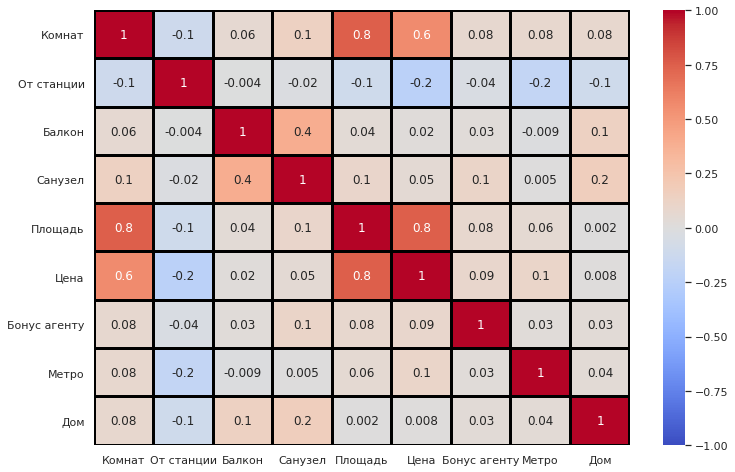

In [ ]:
rcParams['figure.figsize'] = 12, 8 # Увеличим размер графиков
# Метод, подсчитывающий попарную корреляцию для элементов.
corr_matrix = categorical.corr('spearman') 
# Можно указать в параметрах способ подсчета.
sns.heatmap(corr_matrix, cmap= 'coolwarm', vmin=-1, center=0, linewidths=2,
            linecolor='black', annot = True, fmt='.1g')  